In [46]:
# 이 코드에서는 유클리디안 거리와 코사인 각도 두 가지 방법을 통해 주어진 점으로부터 유사한 근처 점 세 개를 찾아봅니다.(KNN)  
from random import randint # 특정 구간 사이의 integer를 랜덤하게 반환해주는 모듈

N = 30 # 전체 개수
data = list()
category = list()

for i in range(N): # 테스트용 더미 데이터 생성
    data.append((randint(1, 100), randint(1,100)))
    category.append(randint(0,1))
    


In [47]:
# 유클리디안 거리 계산
from math import sqrt

def Euclidean(inst1, inst2):
    return sqrt((inst1[0] - inst2[0]) ** 2 + (inst1[1] - inst2[1]) ** 2) 

In [48]:
# 코싸인 계산
def cosine(inst1, inst2):
    innerProduct = 0
    inst1Length = Euclidean((0,0), inst1) # 원점으로부터 자기 자신까지 길이에 대한 벡터를 구함
    inst2Length = Euclidean((0,0), inst2)
    
    for i in range(len(inst1)):
        innerProduct += inst1[i] * inst2[i]
        
    return innerProduct / (inst1Length * inst2Length) # 코싸인값 반환

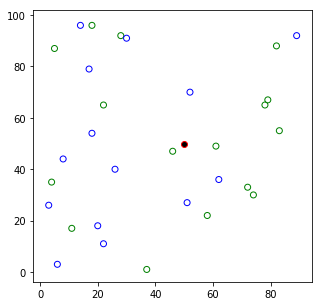

In [49]:
import matplotlib.pyplot as plt

x = [point[0] for point in data]
y = [point[1] for point in data]
target = (50, 50)
distance = list()
angle = list()

colorMap = ['b', 'g']
plt.rcParams["figure.figsize"] = (5,5)

for i in range(N):
    distance.append((i, Euclidean(data[i], target)))
    angle.append((i, cosine(data[i], target))) # 결과값이 1일수록 제일 가까움. 
    plt.scatter(x[i], y[i], facecolors = "none", edgecolors=colorMap[category[i]])
plt.scatter(target[0], target[1], facecolors = "k", edgecolors="r")

plt.show()

In [50]:
K = 3 # 알고 싶은 점 
simmilarity = sorted(distance, key=lambda x:x[1], reverse=False)[:K] # 거리가 가까운 순으로 키를 잡고 정렬. K=3이므로 주변 점 3개를 보고 판단한다. 

In [51]:
candidate = list([0] * len(set(category))) # 0으로 채운 것을 여러개 만듬
for i in simmilarity:
    candidate[category[i[0]]] +=1 # 0번째일때의 클래스를 가져오기

In [52]:
print(max(candidate))
candidate.index(max(candidate))

2


1

In [ ]:
# 유클리디안 거리로 근처 점들 찾기

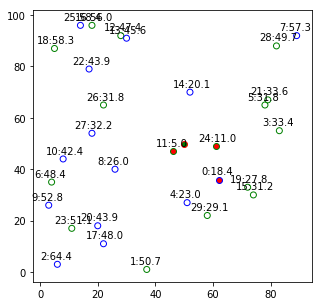

In [53]:
for i in range(N):
    if i in [_[0] for _ in simmilarity]:
        plt.scatter(x[i], y[i], facecolors = "r", edgecolors=colorMap[category[i]])
    else:
        plt.scatter(x[i], y[i], facecolors = "none", edgecolors=colorMap[category[i]])
    plt.text(x[i]-6, y[i]+2, "{0}:{1:2.1f}".format(i, distance[i][1])) # 몇번째 인덱스였고, 거리가 얼마였는지 출력
plt.scatter(target[0], target[1], facecolors = colorMap[candidate.index(max(candidate))], edgecolors="r")

plt.show()

In [55]:
# cosine 각도로 유사한 점들 찾기

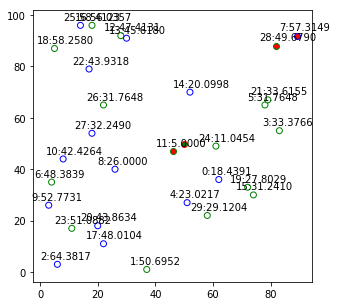

In [54]:
K = 3 # 알고 싶은 점 
simmilarity = sorted(angle, key=lambda x:x[1], reverse=True)[:K] # 각거리가 가까운 순으로 키를 잡고 정렬. K=3이므로 주변 점 3개를 보고 판단한다. 

candidate = list([0] * len(set(category))) # 0으로 채운 것을 여러개 만듬
for i in simmilarity:
    candidate[category[i[0]]] +=1 # 0번째일때의 클래스를 가져오기
    
for i in range(N):
    if i in [_[0] for _ in simmilarity]:
        plt.scatter(x[i], y[i], facecolors = "r", edgecolors=colorMap[category[i]])
    else:
        plt.scatter(x[i], y[i], facecolors = "none", edgecolors=colorMap[category[i]])
    plt.text(x[i]-6, y[i]+2, "{0}:{1:2.4f}".format(i, distance[i][1])) # 몇번째 인덱스였고, 거리가 얼마였는지 출력
plt.scatter(target[0], target[1], facecolors = colorMap[candidate.index(max(candidate))], edgecolors="r")

plt.show()